# Introdução ao PyTorch


[PyTorch](http://pytorch.org/) é um framework para desenolver e treinar redes neurais. Muitas de suas funções se comportam exatamente da mesma forma que o numpy, onde os arrays são chamados de tensores. A vantagem desses tensores em relação aos arrays do numpy é que eles facilitam a movimentação dos dados da CPU para a GPU, e também são usados por funções do PyTorch para computar altomaticamente gradientes (para o backpropagation) e outros modulos para construir redes neurais. No geral, PyTorch é mais coerente com programação Python e Numpy/Scipy quando comparada com TensorFlow ou outros frameworks.


Como vimos na Regressão Linear, Regressão Logística e Perceptron, uma coisa muito comum na área de aprendizado de máquinas é resolver equações lineares do tipo:

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

Em forma de vetores, podemos representar o produto escalar:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## Tensores

A grosso modo, algoritmos de aprendizado envolvem um monte de operações de algebra linear em tensores, uma generalização de matrizes. Um vetor é um tensor de 1 dimensão, e uma matriz é um tensor de 2 dimensões, e um array com 3 dimensões é um tensor tridimensional (para imagens com RGB, por exemplo). Sendo assim, a estrutura fundamental de redes neurais e PyTorch são os tensores.


<img src="assets/tensor_examples.svg" width=600px>

Vejamos alguns exemplos de uso do PyTorch e seus tensores

In [1]:
# Primeiramente, importamos o PyTorch
import torch

In [2]:
def activation(x):
    """ Função de ativação - Sigmoid
    
        Argumentos
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [3]:
### Gerando dados aleatórios
torch.manual_seed(7) # Seta um seed para sempre gerar os mesmos números aleatórios

# Features é um tensor com 1 linha (1 única amostra) e 5 colunas (5 características por amostra), 
#   inicializadas de forma aleatória usando uma distribuição normal com média zero e desvio 1.
features = torch.randn((1, 5))

# Gerando os pesos aleatórios para o nosso modelo. randn_like gera um tensor com as mesmas carácterísticas
#    que o tensor passado como parâmetro
weights = torch.randn_like(features)


# termo de bias - tensor com uma única linha e coluna.
bias = torch.randn((1, 1))

Esses tensores podem ser somados, subtraidos, multiplicados, etc, assim como os arrays numpy. Em geral, usamos os tensores de forma bem parecida com esses arrays, com a vantagem de poder utilizar em GPUs. Como exemplo, podemos computar a saída desse nosso modelo de neurônio:

In [4]:
# Podemos predizer a saída do nosso neurônio:

# Assim como numpy, podemos usar as opções torch.sum(), assim como o métodos .sum() nos tensores.

# opção 1 - torch.sum()
y = activation(torch.sum(features * weights) + bias)
print('opção 1: ', y)

# opção 2 - .sum()
y = activation((features * weights).sum() + bias)
print('opção 2: ', y)

# Podemos também juntar as operações de soma e multiplicação numa única operação, executando a multiplicação
#   de matrizes. Em geral, multiplicação de matriz é mais eficiente, principalmente em GPUs. 
#   Para tanto, podemos utilizar as funções torch.mm() ou torch.matmul() - a última é mais complicada
#      e oferece mais opções (verificar em https://pytorch.org/docs/stable/generated/torch.matmul.html).

# opção 3 - torch.mm()
y = activation(torch.mm(features, weights.view(5,1)) + bias)
print('opção 3: ', y)

opção 1:  tensor([[0.1595]])
opção 2:  tensor([[0.1595]])
opção 3:  tensor([[0.1595]])


Note que na opção 3 tivemos que redimensionar nosso vetor de pesos com a função .view(). Caso contrário, teríamos um erro muito comum:

In [5]:
# torch.mm(features, weights)

Isso por que, na multiplicação de matrizes, o número de colunas no primeiro tensor deve ser igual ao número de linhas do segundo tensor. Tanto o tensor features quanto o tensor weights tem o mesmo formato, i.e., (1,5). Sendo assim, foi necessário mudar o formato para que a multiplicação funcionasse.

Obs: para ver o formato de um tensor, podemos simplesmente usar .shape.

Existem também algumas opções para mudar o formato do tensor: [`.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape), [`.resize_()`](https://pytorch.org/docs/stable/generated/torch.Tensor.resize_.html#torch.Tensor.resize_) e [`.view()`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view).

Usando como exemplo nosso tensor weights:

* `weights.reshape(a, b)` retorna um novo tensor com os mesmos dados de `weights` com tamanho `(a, b)`, quando possível retorna apenas um view(), quando não, faz uma cópia dos dados.

* `weights.resize_(a, b)` retorna o mesmo tensor com um formato diferente. Se o número de elementos for menor que o original, alguns elementos serão removidos do tensor (mas não da memória). Se o novo formato tem mais elementos, estes serão inicializados na memória. Note que o _ quer dizer que as operações são executadas **in-place**. [Clique aqui para mais informações a respeito](https://discuss.pytorch.org/t/what-is-in-place-operation/16244).

* `weights.view(a, b)` retorna um tensor  no formato `(a, b)` com os mesmos dados contidos wm `weights`.



## Numpy para Torch e vice-versa

PyTorch apresenta diversos modos de converter entre arrays Numpy e tensores Torch. Vejamos alguns exemplos:

In [6]:
# Gerando um array numpy de (4,3)
import numpy as np
a = np.random.rand(4,3)
a

array([[0.28918285, 0.44465263, 0.86801931],
       [0.41994445, 0.69562519, 0.82796169],
       [0.24680303, 0.43816294, 0.27679853],
       [0.37408619, 0.93857607, 0.85697804]])

In [7]:
# Convertendo de numpy para tensor
b = torch.from_numpy(a)
b

tensor([[0.2892, 0.4447, 0.8680],
        [0.4199, 0.6956, 0.8280],
        [0.2468, 0.4382, 0.2768],
        [0.3741, 0.9386, 0.8570]], dtype=torch.float64)

In [8]:
# convertendo de tensor para numpy
b.numpy()

array([[0.28918285, 0.44465263, 0.86801931],
       [0.41994445, 0.69562519, 0.82796169],
       [0.24680303, 0.43816294, 0.27679853],
       [0.37408619, 0.93857607, 0.85697804]])

A memória é compartilhada entre o array Numpy e o tensor Torch, então, se o valor de um objeto for mudado _in-place_ , o outro objeto também será alterado.

In [9]:
# Multiplicando o tensor por 2, in-place
b.mul_(2)

tensor([[0.5784, 0.8893, 1.7360],
        [0.8399, 1.3913, 1.6559],
        [0.4936, 0.8763, 0.5536],
        [0.7482, 1.8772, 1.7140]], dtype=torch.float64)

In [10]:
# O array numpy é ajustado ao novo valor
a

array([[0.5783657 , 0.88930526, 1.73603862],
       [0.83988891, 1.39125038, 1.65592337],
       [0.49360606, 0.87632588, 0.55359706],
       [0.74817239, 1.87715214, 1.71395608]])

## Regressão linear com PyTorch

<img src="assets/rl.png" width=600px>

In [11]:
# Passo n°1: importando pacotes
import torch
from torch.autograd import Variable
from torch.nn import functional as F

In [12]:
# Verificando a versão do PyTorch e se está usando GPU
print('Versão PyTorch: ', torch.__version__)
print('Usando GPU: ', torch.cuda.is_available())

if torch.cuda.is_available():    
    print('GPU: ',torch.cuda.get_device_name(torch.cuda.current_device()))

Versão PyTorch:  1.9.0
Usando GPU:  True
GPU:  GeForce GTX 1660 Ti with Max-Q Design


In [13]:
# Passo n°2: gerando algumas amostras
x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

Para configurar a classe do nosso modelo, precisamos definir a classe init (onde definimos os atributos) e forward (em redes neurais é muito comum, visto que a etapa de atualização dos pesos é feita de modo backward com o backpropagation). 

Como o modelo recebe como entrada uma amostra com uma única _feature_ e entrega como saída um único valor, inicializamos o modelo com uma camada linear: torch.nn.Linear(1, 1). Linear por que essa camada executa uma combinação linear (os pesos e bias são intrínsicos na camada e não precisamos definir). O primeiro 1 representa o número de características de entrada, e o segundo 1 significa o tamanho da saída.

Em seguida, definimos a função forward, que basicamente contém as instruções da sequência dos passos do modelo. Em outras palavras, esse passo executa todos os processos do modelo desde os dados de entrada até a saída. Como a regressão linear é bem simples, a função recebe uma entrada $x$ e produz uma estimativa de $y$ como saída, ou seja, $\hat{y}$.

In [14]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
model = LinearRegression()

## Função de Loss (Criterion) e Otimizador

Após executar a função forward, a função de loss é usada para computar o quão distante está $\hat{y}$ de $y$, e assim ajustar os pesos para aproximar essa diferença, a fim de produzir o melhor modelo possível. Definir essa função de loss no PyTorch é muito simples. Nesse caso usaremos o erro médio quadrado ( _Mean Square Error (MSE)_ ), por ser mais comum na tarefa de regressão.

In [15]:
criterion = torch.nn.MSELoss()

Na sequência, usaremos o otimizador Gradiente Descendente Estocástico (_Stochastic Gradient Descent (SGD)_) para atualizar os pesos do modelo. A função model.parameters() diz ao otimizador quais são os pesos a serem atualizados, enquanto _lr_ instrui qual a taxa de aprendizado será utilizada.

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Treinando o modelo

Agora nosso modelo está pronto para ser treinado. O procedimento será executado por $20$ épocas.

In [17]:
for epoch in range(20):
    model.train()
    
    # Zera os gradientes a cada época (usado no backpropagation).
    #   esse passo é necessário pois a cada vez que o erro é propagado, 
    #   ele é acumulado em vez de ser substituido.
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_data)
    
    # Computa o erro
    loss = criterion(y_pred, y_data)
    
    # Propaga o erro para as camadas anteriores 
    #    (no caso só temos um, mas seguimos o padrão de redes maiores)
    loss.backward()
    # Atualiza os pesos
    optimizer.step()

## Fazendo predições

Agora que o modelo está treinado, podemos usá-lo para fazer predições dado novos valores de entrada:

In [18]:
new_x = Variable(torch.Tensor([[4.0]]))
y_pred = model(new_x)
print("Valor estimado: ", float(y_pred.data[0][0]))

Valor estimado:  39.5115966796875


## Regressão Logística

<img src="assets/regLog.png" width=400px>

In [19]:
# importando pacotes

# https://towardsdatascience.com/logistic-regression-on-mnist-with-pytorch-b048327f8d19
    
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

## Carregando o dataset

Usamos torchvision.datasets para carregar o dataset Fashion-MNIST. Transforms são ferramentas de normalização, aumento de dados, entre outros. Nesse caso utilizaremos apenas para transformar em vetor.

In [20]:
train_dataset = dsets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor())

## Criando um data loader

Conjuntos de dados grandes não podem ser carregados diretamente na memória, principalmente da GPU, por falta de espaço. Para isso, utilizamos data loaders, para carregar _batches_, ou seja, porções de amostras, a cada chamada.

In [21]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## Criando o modelo

In [22]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

## Definindo os hyperparâmetros e instanciando o modelo

In [23]:
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

model = LogisticRegression(input_dim, output_dim)

## Instanciando a classe de Loss

Em seguida definimos nossa função de loss, no caso a entropia cruzada (Cross-Entropy (CE)). Note que CE é praticamente a função Maximum Likelihood Estimation (MLE) que aprendemos na aula passada, com sinal inverso, ou seja, minimizar o BCE é praticamente a mesma coisa que maximizar o MLE.

In [24]:
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy

## Definindo o otimizador

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

## Treinando o modelo

In [26]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.float()/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.6429442167282104. Accuracy: 62.7599983215332.
Iteration: 1000. Loss: 1.3624911308288574. Accuracy: 65.36000061035156.
Iteration: 1500. Loss: 1.1315202713012695. Accuracy: 66.77999877929688.
Iteration: 2000. Loss: 0.932007372379303. Accuracy: 67.7699966430664.
Iteration: 2500. Loss: 0.9733914732933044. Accuracy: 68.6500015258789.
Iteration: 3000. Loss: 1.0482072830200195. Accuracy: 69.58999633789062.


#### Verificação da versão do PyTorch e GPU ativa

In [27]:
print('Versão PyTorch: ', torch.__version__)
print('Usando GPU: ', torch.cuda.is_available())

if torch.cuda.is_available():    
    print('GPU: ',torch.cuda.get_device_name(torch.cuda.current_device()))

Versão PyTorch:  1.9.0
Usando GPU:  True
GPU:  GeForce GTX 1660 Ti with Max-Q Design


## Exercícios

**1.** Plotar algumas imagens do dataset fashion MNIST para ter uma idea de como são as amostras.

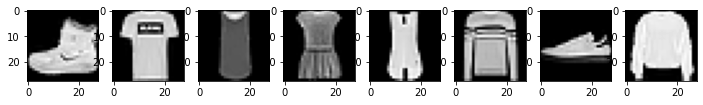

In [28]:
import matplotlib.pyplot as plt

num_imagens = 8
fig, axs = plt.subplots(1, num_imagens, figsize=(12, 4))
for i in range(num_imagens):
    axs[i].imshow(train_dataset[i][0].reshape(28, 28), cmap=plt.get_cmap("gray"))

**2.** Estimar os rótulos das amostras de teste, computar a acurácia e gerar uma matriz de confusão para ver com quais classes cada classe está se confundindo

- **Estimação dos rótulos das amostras de teste**

In [29]:
predicted = []
expected = []
for image, label in test_dataset:
    image = Variable(image.view(-1, 28*28))
    outputs = model(image)
    _, prediction = torch.max(outputs.data, 1)
    predicted.append(prediction.item())
    expected.append(label)

In [30]:
import pandas as pd

results = pd.DataFrame({'predicted': predicted, 'expected':expected})
results

,predicted,expected
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,3,8
9998,1,1


- **Cálculo da Acurácia**

In [31]:
accuracy = (results['predicted'] == results['expected']).sum()/len(results)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 0.6959


- **Matriz de Confusão**

In [32]:
label_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
              5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

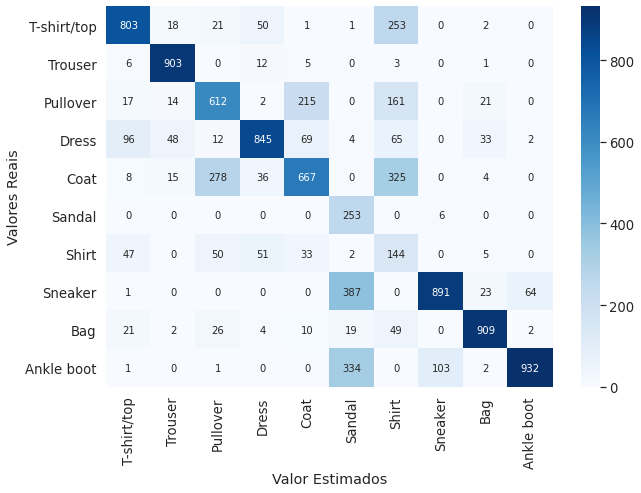

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted, expected)
df_cm = pd.DataFrame(cm, columns=label_dict.values(), index=label_dict.values())
df_cm.index.name = "Valores Reais"
df_cm.columns.name = "Valor Estimados"
plt.figure(figsize = (10,7))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 10})
plt.show()

**3.** Rodar esse algoritmo utilizando o dataset Kuzushiji-MNIST (KMNIST). Pesquisar para fazer aumento de dados (transform) com horizontal flipping. Plotar algumas imagens desse dataset também. 

- **Carregamento do dataset**

In [34]:
train_dataset = dsets.KMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.KMNIST(root='./data', train=False, transform=transforms.ToTensor())
print(f"> {len(train_dataset)} amostras de Treino e {len(test_dataset)} amostras de Teste")

> 60000 amostras de Treino e 10000 amostras de Teste


- **Criação de um DataLoader para carregamento em batches**

In [35]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

- **Visualização de algumas imagens**

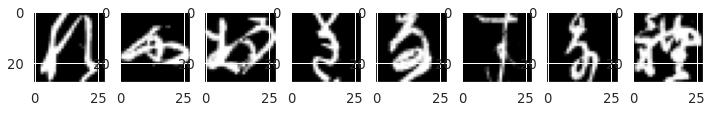

In [36]:
import matplotlib.pyplot as plt

num_imagens = 8
fig, axs = plt.subplots(1, num_imagens, figsize=(12, 4))
for i in range(num_imagens):
    axs[i].imshow(train_dataset[i][0].reshape(28, 28), cmap=plt.get_cmap("gray"))

- **Criação do modelo**

In [37]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

- **Definição de Hiperparâmetros**

In [38]:
n_iters = 5000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.01

model = LogisticRegression(input_dim, output_dim)

- **Instanciando class de Loss**

In [39]:
criterion = torch.nn.CrossEntropyLoss()

- **Definição do Otimizador**

In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

- **Treinamento do Modelo**

In [41]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.float()/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.9610012173652649. Accuracy: 56.11000061035156.
Iteration: 1000. Loss: 0.9974948763847351. Accuracy: 60.59000015258789.
Iteration: 1500. Loss: 0.6769840717315674. Accuracy: 62.65999984741211.
Iteration: 2000. Loss: 0.8772509098052979. Accuracy: 64.16999816894531.
Iteration: 2500. Loss: 0.7206671237945557. Accuracy: 64.7699966430664.
Iteration: 3000. Loss: 0.6587548851966858. Accuracy: 65.30999755859375.
Iteration: 3500. Loss: 0.7133949398994446. Accuracy: 65.73999786376953.
Iteration: 4000. Loss: 0.7977537512779236. Accuracy: 66.0.
Iteration: 4500. Loss: 0.587852418422699. Accuracy: 66.23999786376953.


- **Estimação dos rótulos das amostras de teste**

In [42]:
predicted = []
expected = []
for image, label in test_dataset:
    image = Variable(image.view(-1, 28*28))
    outputs = model(image)
    _, prediction = torch.max(outputs.data, 1)
    predicted.append(prediction.item())
    expected.append(label)
    
results = pd.DataFrame({'predicted': predicted, 'expected':expected})
results

,predicted,expected
0,5,2
1,9,9
2,3,3
3,8,8
4,3,3
...,...,...
9995,9,4
9996,0,0
9997,9,9
9998,0,4


- **Cálculo da Acurácia do Modelo**

In [43]:
accuracy = (results['predicted'] == results['expected']).sum()/len(results)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 0.6659


- **Matriz de Confusão**

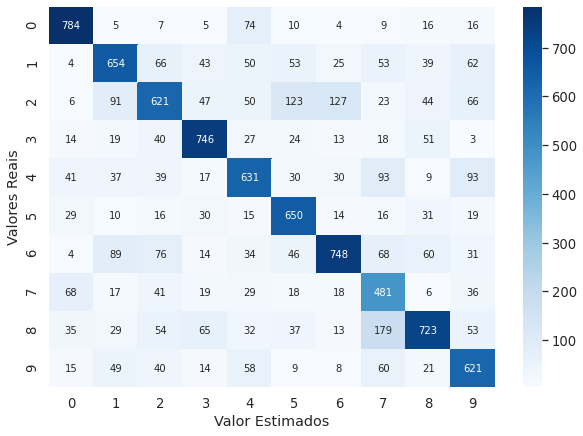

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted, expected)
df_cm = pd.DataFrame(cm)
df_cm.index.name = "Valores Reais"
df_cm.columns.name = "Valor Estimados"
plt.figure(figsize = (10,7))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 10})
plt.show()

- **Treinando o Modelo com Horizontal Flipping**

In [45]:
# Horizontal Flipping com probabilidade 0.5
transf = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                             transforms.ToTensor()])

train_transf_dataset = dsets.KMNIST(root='./data', train=True, transform=transf)
test_transf_dataset = dsets.KMNIST(root='./data', train=False, transform=transf)

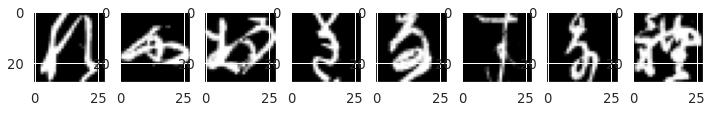

In [46]:
num_imagens = 8
fig, axs = plt.subplots(1, num_imagens, figsize=(12, 4))
for i in range(num_imagens):
    axs[i].imshow(train_dataset[i][0].reshape(28, 28), cmap=plt.get_cmap("gray"))

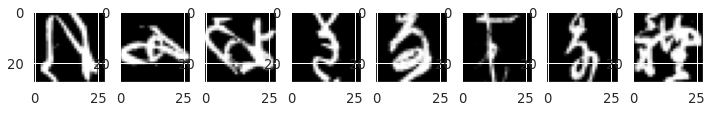

In [47]:
num_imagens = 8
fig, axs = plt.subplots(1, num_imagens, figsize=(12, 4))
for i in range(num_imagens):
    axs[i].imshow(train_transf_dataset[i][0].reshape(28, 28), cmap=plt.get_cmap("gray"))

In [48]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_transf_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_transf_dataset, batch_size=batch_size, shuffle=False)

n_iters = 5000
epochs = n_iters / (len(train_transf_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.01

model = LogisticRegression(input_dim, output_dim)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.float()/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.2976059913635254. Accuracy: 48.630001068115234.
Iteration: 1000. Loss: 1.1926395893096924. Accuracy: 50.810001373291016.
Iteration: 1500. Loss: 1.2210100889205933. Accuracy: 51.880001068115234.
Iteration: 2000. Loss: 1.0401936769485474. Accuracy: 52.33000183105469.
Iteration: 2500. Loss: 1.1704069375991821. Accuracy: 52.650001525878906.
Iteration: 3000. Loss: 0.8199025988578796. Accuracy: 53.0.
Iteration: 3500. Loss: 0.8665782809257507. Accuracy: 53.43000030517578.
Iteration: 4000. Loss: 0.8011781573295593. Accuracy: 53.88999938964844.
Iteration: 4500. Loss: 0.9372343420982361. Accuracy: 54.41999816894531.


In [49]:
predicted = []
expected = []
for image, label in test_dataset:
    image = Variable(image.view(-1, 28*28))
    outputs = model(image)
    _, prediction = torch.max(outputs.data, 1)
    predicted.append(prediction.item())
    expected.append(label)
    
results = pd.DataFrame({'predicted': predicted, 'expected':expected})
results

,predicted,expected
0,5,2
1,9,9
2,3,3
3,8,8
4,3,3
...,...,...
9995,0,4
9996,5,0
9997,2,9
9998,9,4


In [50]:
accuracy = (results['predicted'] == results['expected']).sum()/len(results)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 0.543


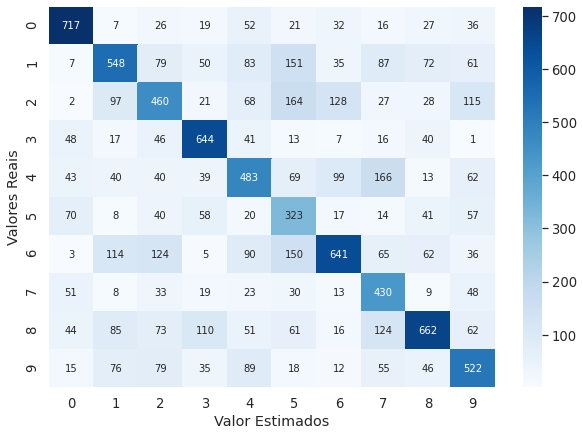

In [51]:
cm = confusion_matrix(predicted, expected)
df_cm = pd.DataFrame(cm)
df_cm.index.name = "Valores Reais"
df_cm.columns.name = "Valor Estimados"
plt.figure(figsize = (10,7))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 10})
plt.show()